In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split, learning_curve 
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.pipeline import make_pipeline  
from sklearn.metrics import mean_squared_error  
from sklearn.datasets import fetch_california_housing 



In [2]:
housing = fetch_california_housing()  
X, y = housing.data, housing.target  

In [3]:

np.random.seed(1) 
indices = np.random.choice(len(X), size=1000, replace=False)  
X = X[indices]  
y = y[indices]  


In [4]:

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.33, random_state=1)


In [5]:
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation error")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
 

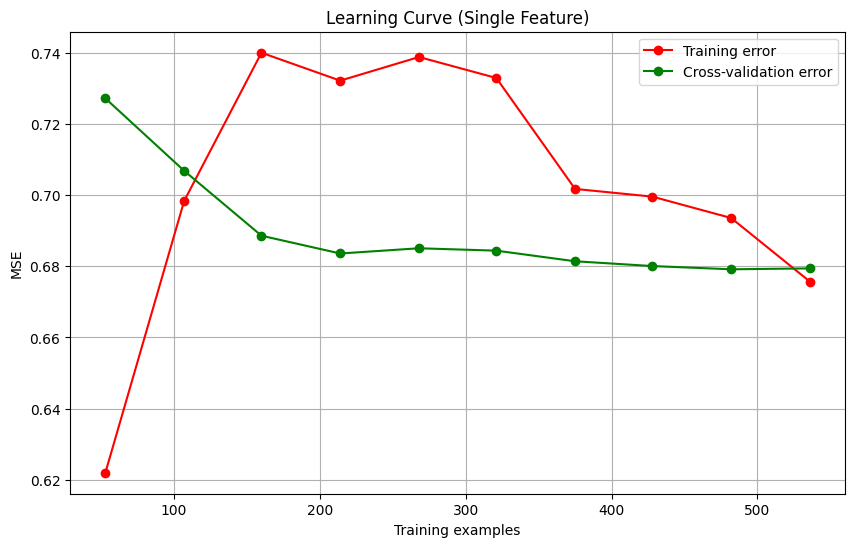

In [6]:
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X[:, 0].reshape(-1, 1), y, test_size=0.33, random_state=1)
plot_learning_curve(LinearRegression(), X_train_single, y_train_single, title="Learning Curve (Single Feature)")

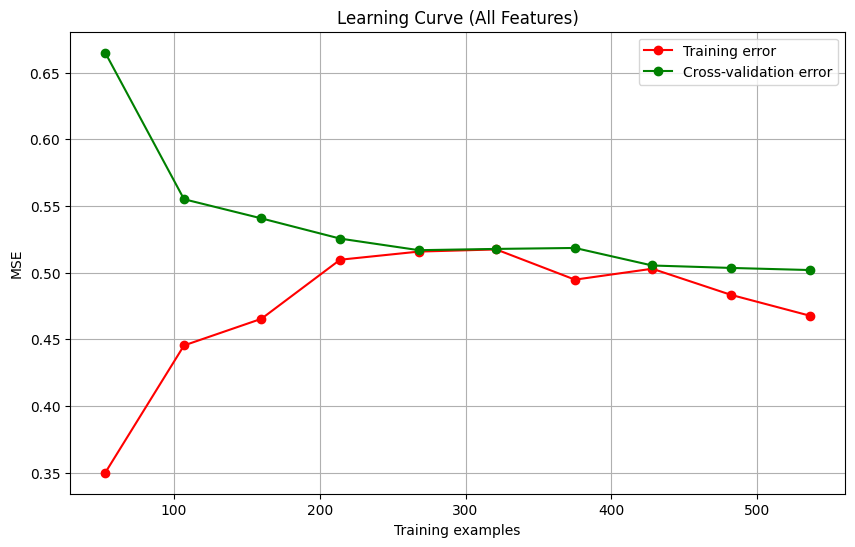

In [7]:
plot_learning_curve(LinearRegression(), X_train_full, y_train_full, title="Learning Curve (All Features)")
 

In [8]:
 def plot_model_complexity_curve(X_train, y_train, X_test, y_test, max_degree=6):   
    train_errors = []
    test_errors = []
    degrees = range(1, max_degree + 1)
    for degree in degrees: 
         model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
         model.fit(X_train, y_train)
         y_train_pred = model.predict(X_train)
         y_test_pred = model.predict(X_test)
         train_errors.append(mean_squared_error(y_train, y_train_pred))
         test_errors.append(mean_squared_error(y_test, y_test_pred))
        
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, train_errors, 'o-', color="r", label="Training error")
    plt.plot(degrees, test_errors, 'o-', color="g", label="Cross-validation error")
    plt.xlabel("Polynomial Degree")
    plt.ylabel("MSE")
    plt.title("Model Complexity Curve")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

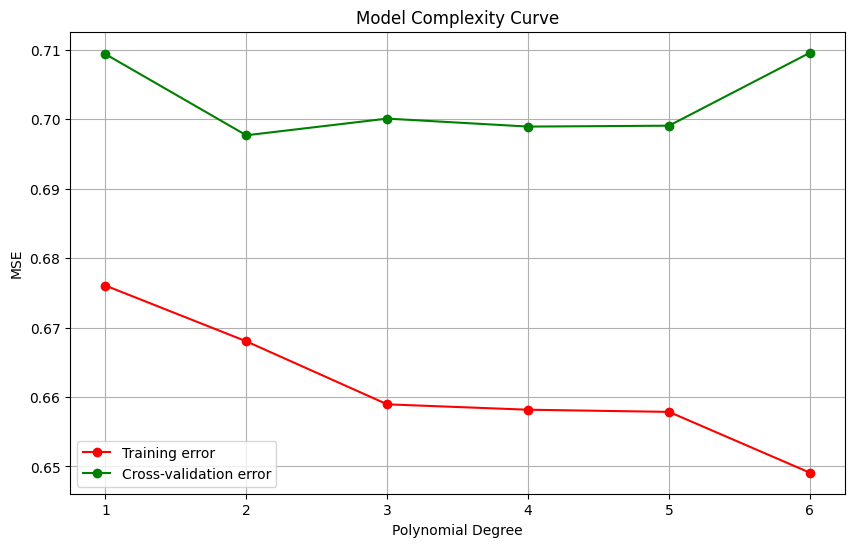

In [9]:
plot_model_complexity_curve(X_train_single, y_train_single, X_test_single, y_test_single, max_degree=6)

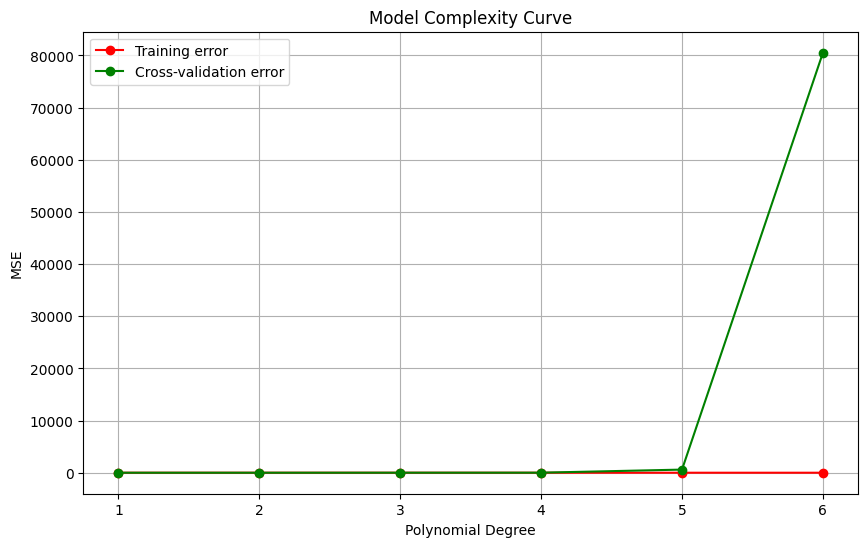

In [10]:
plot_model_complexity_curve(X_train_full, y_train_full, X_test_full, y_test_full, max_degree=6)